In [1]:
#15.433 - Finance Lab
#William Blair Team
#Getting the necessary inputs for the Option Pricing Model

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
#Reading the provided files
##Reading the Initial File
Col_Names_1 = ['Date', 'Issuer Name', 'Ticker', 'Country Code', 'Country', 'Debt Security Name', 'Bid Price USD', 'Equity Security Name', 'Equity Price USD', 'Equity Total Return', 'Fiscal Date', 'Total Assets', 'Total Liabilities', 'Total Corporate Debt', 'Total Shareholders Equity', 'Shares Outstanding', 'Dividends per Share', 'Dividends Paid', 'Dividend Yield']
Filepath_1 = 'MexicanSecurityData.csv'
Type = {'Date':'object', 'Issuer Name':'object', 'Ticker':'object', 'Country Code':'object', 'Country':'object', 'Debt Security Name':'object', 'Bid Price USD':'float64', 'Equity Security Name':'object', 'Equity Price USD':'float64', 'Equity Total Return':'float64', 'Fiscal Date':'float64', 'Total Assets':'float64', 'Total Liabilities':'float64', 'Total Corporate Debt':'float64', 'Total Shareholders Equity':'float64', 'Shares Outstanding':'float64', 'Dividends per Share':'float64', 'Dividends Paid':'float64', 'Dividend Yield':'float64'}
Mexican_Data = pd.read_csv(Filepath_1, header = 0, dtype = Type, names = Col_Names_1, na_values = ' NA')


##Reading the Maturity File
Col_Names_2 = ['Debt Name', 'Maturity']
Filepath_2 = 'MexicanMaturities.xlsx'
Mexican_Maturities = pd.read_excel(Filepath_2, header = 0, names = Col_Names_2, na_values = ' NA')


##Reading the Treasury File
Col_Names_3 = ['Date', '3M Libor', '1Y', '3Y', '5Y', '7Y', '10Y', '15Y', '30Y']
Filepath_3 = 'USTRateData.csv'
Treasury_Rate = pd.read_csv(Filepath_3, header = 0, names = Col_Names_3, na_values = ' NA')


## For simplicity, we will start working with one bond - the one of Banorte
Cemex = Mexican_Data[Mexican_Data['Ticker'] == 'CEMEX'][Mexican_Data['Debt Security Name'] == 'MX Cemex 5.2% due 30 Quoted Price Bid']
Cemex = Cemex.reset_index()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [4]:
# Check for missing values in Equity Total Return
Cemex[Cemex['Equity Total Return'].isna()]

,index,Date,Issuer Name,Ticker,Country Code,Country,Debt Security Name,Bid Price USD,Equity Security Name,Equity Price USD,Equity Total Return,Fiscal Date,Total Assets,Total Liabilities,Total Corporate Debt,Total Shareholders Equity,Shares Outstanding,Dividends per Share,Dividends Paid,Dividend Yield
27,1777,2014-02-03,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),1.231317,NaN,20131231.0,3.594576e+10,2.462131e+10,1.758383e+10,1.018381e+10,1.336392e+10,0.000000,0.000000e+00,0.000000
56,1806,2014-03-17,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),1.208562,NaN,20131231.0,3.594576e+10,2.462131e+10,1.758383e+10,1.018381e+10,1.336392e+10,0.000000,0.000000e+00,0.000000
79,1829,2014-04-17,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),1.304483,NaN,20140331.0,3.593501e+10,2.448192e+10,1.670728e+10,1.028991e+10,1.368831e+10,0.000000,0.000000e+00,0.000000
88,1838,2014-05-01,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),1.281452,NaN,20140331.0,3.593501e+10,2.448192e+10,1.670728e+10,1.028991e+10,1.368831e+10,0.000000,0.000000e+00,0.000000
183,1933,2014-09-16,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),1.319223,NaN,20140630.0,3.576308e+10,2.409657e+10,1.656475e+10,1.047800e+10,1.381781e+10,0.000000,0.000000e+00,0.000000
225,1975,2014-11-17,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),1.230916,NaN,20140930.0,3.502534e+10,2.367910e+10,1.647845e+10,1.015373e+10,1.401149e+10,0.000000,0.000000e+00,0.000000
243,1993,2014-12-12,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),1.060521,NaN,20140930.0,3.502534e+10,2.367910e+10,1.647845e+10,1.015373e+10,1.401149e+10,0.000000,0.000000e+00,0.000000
276,2026,2015-02-02,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),0.895151,NaN,20141231.0,3.305667e+10,2.300419e+10,1.658298e+10,8.894545e+09,1.401196e+10,0.000000,0.000000e+00,0.000000
305,2055,2015-03-16,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),0.969854,NaN,20141231.0,3.305667e+10,2.300419e+10,1.658298e+10,8.894545e+09,1.401196e+10,0.000000,0.000000e+00,0.000000
318,2068,2015-04-02,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),0.951559,NaN,20150331.0,3.262068e+10,2.303400e+10,1.628808e+10,8.445619e+09,1.406107e+10,0.000000,0.000000e+00,0.000000


In [5]:
## Drop missing values in Equity Total Return

Cemex = Cemex.dropna(subset=['Equity Total Return'])
Cemex

,index,Date,Issuer Name,Ticker,Country Code,Country,Debt Security Name,Bid Price USD,Equity Security Name,Equity Price USD,Equity Total Return,Fiscal Date,Total Assets,Total Liabilities,Total Corporate Debt,Total Shareholders Equity,Shares Outstanding,Dividends per Share,Dividends Paid,Dividend Yield
0,1750,2013-12-23,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),1.168784,-0.000775,20130930.0,3.578495e+10,2.396502e+10,1.657464e+10,1.069903e+10,1.336236e+10,0.0,0.0,0.0
1,1751,2013-12-24,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),1.172175,0.002902,20130930.0,3.578495e+10,2.396502e+10,1.657464e+10,1.069903e+10,1.336236e+10,0.0,0.0,0.0
2,1752,2013-12-26,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),1.168739,-0.002931,20130930.0,3.578495e+10,2.396502e+10,1.657464e+10,1.069903e+10,1.336236e+10,0.0,0.0,0.0
3,1753,2013-12-27,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),1.175660,0.005921,20130930.0,3.578495e+10,2.396502e+10,1.657464e+10,1.069903e+10,1.336236e+10,0.0,0.0,0.0
4,1754,2013-12-30,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,NaN,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),1.172736,-0.002487,20130930.0,3.578495e+10,2.396502e+10,1.657464e+10,1.069903e+10,1.336236e+10,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,3495,2020-12-15,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,109.0,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),0.523045,-0.003261,20200930.0,2.858393e+10,1.976111e+10,1.236260e+10,7.414195e+09,1.472897e+10,NaN,0.0,0.0
1746,3496,2020-12-16,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,109.7,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),0.527087,0.007728,20200930.0,2.858393e+10,1.976111e+10,1.236260e+10,7.414195e+09,1.472897e+10,NaN,0.0,0.0
1747,3497,2020-12-17,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,110.0,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),0.540391,0.025240,20200930.0,2.858393e+10,1.976111e+10,1.236260e+10,7.414195e+09,1.472897e+10,NaN,0.0,0.0
1748,3498,2020-12-18,MX Cemex,CEMEX,MX,MEXICO,MX Cemex 5.2% due 30 Quoted Price Bid,109.0,CEMEX SAB DE CV CPO NPV(REP 2'A' & 1'B'),0.515851,-0.045411,20200930.0,2.858393e+10,1.976111e+10,1.236260e+10,7.414195e+09,1.472897e+10,NaN,0.0,0.0


In [6]:
#First, we get the Total MV of Assets

##Getting the necessary inputs with the correct data type
Total_Debt = pd.to_numeric(Cemex['Total Corporate Debt'], errors = 'coerce').to_numpy()
Stock_Price = pd.to_numeric(Cemex['Equity Price USD'], errors = 'coerce').to_numpy()
Shares_Outstanding = pd.to_numeric(Cemex['Shares Outstanding'], errors = 'coerce').to_numpy()

##Getting the MV of Equity
Equity = Stock_Price *  Shares_Outstanding

##Getting the MV of Assets
MV_Assets = Total_Debt + Equity
print(MV_Assets[0:7])

[3.21923532e+10 3.22376735e+10 3.21917585e+10 3.22842331e+10
 3.22451614e+10 3.32362747e+10 3.30086563e+10]


In [7]:
#Second, we get the Assets' Volatility

##We calculate the equity volatility
Lambda = 0.9075


Equity_Returns = pd.to_numeric(Cemex['Equity Total Return'], errors = 'coerce').to_numpy()
l = len(Equity_Returns)
Equity_Volatility = np.zeros(l)
Equity_Volatility[1] = np.sqrt(Equity_Returns[0]**2)


## Using EWMA, assume we are using last 250 trading days (one year)
EWMA1 = []
n = len(Equity_Returns)-250
for i in range(n):
    total = 0
    for j in range(250):
        total = total + (Lambda**(250-j)) * (Equity_Returns[i+j]**2)
    EWMA1.append((total*(1-Lambda))**0.5)


##Since we used 250 days as the time window, we cannot calculate the volatilities for the first 250 days. 
##For consistency in list lengths of other variables below, I filled EWMA with 250 NaN in the beginning of the list.

EWMA = [np.nan]*250+EWMA1


In [8]:
##We get the D/E ratio
DE_Ratio = Total_Debt / Equity

##Finally, we calculate the Asset Volatility
#####Asset_Volatility = (1 / (1 + DE_Ratio)) * Equity_Volatility
Asset_Volatility = (1 / (1 + DE_Ratio)) * EWMA

##Annuliaze Volatility
Annual_Volatility = Asset_Volatility*np.sqrt(252)

print(Asset_Volatility[-20:-1])

[0.01122545 0.01109995 0.01189095 0.011908   0.01123025 0.01145244
 0.01487386 0.0147912  0.01659928 0.01674332 0.01588465 0.01489184
 0.01502571 0.01447779 0.01403376 0.0135069  0.01293327 0.01254047
 0.01193942]


In [9]:
#Third, we get the strike price - straightforward
Strike_Price = Total_Debt

In [10]:
#Fourth, we get the time to maturity

##We get the maturity of the Cemex Bond from the Mexican Maturities File
Cemex_Maturity = Mexican_Maturities[Mexican_Maturities['Debt Name'] == 'MX Cemex 5.2% due 30 Yield to Mat Bid']
Cemex_Maturity = pd.to_datetime(Cemex_Maturity['Maturity'], format = '%Y%m%d').to_numpy()

##We get the date of the bond from the intial file
Date = pd.to_datetime(Cemex['Date'], format = '%Y/%m/%d').to_numpy()

#Finally, we take the time difference between the actual date and Maturity to get the time to expiration
Expiration_Time = ( Cemex_Maturity - Date ) / (365 * 24 * 60 * 60 * 10**9)

In [11]:
#Fifth, we get the risk-free rate for the US Yield Curve
Treasury_Date = pd.to_datetime(Treasury_Rate['Date'], format = '%Y/%m/%d').to_numpy()
Treasury_Date[0:20]

#For a specific trading day of the bond, we get the closest Treasury Date and for this Treasury Date the closest maturity
Mat = np.array([0.25, 1, 3, 5, 7, 10, 15, 30])
Risk_Free_Rate = []
m = len(Date)
for i in range(m):
    #Specific_Date = Date[i]
    #We get the closest day when treasury rates are reported
    #should be a list of 2555 entries
    day_difference = [abs(Date[i] - x) for x in Treasury_Date]
    
    #Find the index of that closest bond issuing day 
    #Need to be fixed 
    Day_Index = day_difference.index(min(day_difference))
    
    #We get the closest maturity for the specific date
    # should be a list of 8 entries
    maturity_difference = [abs(Expiration_Time[i].astype(np.int64) - x) for x in Mat]
    
    #Find the index of that closest maturity 
    Maturity_Index = maturity_difference.index(min(maturity_difference))
    
    Treasury_Specific_Rate = Treasury_Rate.iloc[Day_Index, Maturity_Index]
    #We get the continuously-compounded rate
    Rate = np.log(1 + Treasury_Specific_Rate)
    Risk_Free_Rate.append(Rate) 

len(Risk_Free_Rate)

1700

In [12]:
# option pricing function (no dividend)
def priceBS(S0, K, T, r, sigma, Type):
    d1 = (np.log(S0/K) + (r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S0/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    if Type == "C":
        return S0*stats.norm.cdf(d1,0,1) - K*np.exp(-r*T)*stats.norm.cdf(d2, 0, 1)
    else: 
        return K*np.exp(-r*T)*stats.norm.cdf(-d2, 0, 1) - S0*stats.norm.cdf(-d1,0,1)

In [13]:
## Non-dividend paying 
simu_asset_price = []
for i in range(len(Equity_Returns)):
    simu_asset_price.append(Strike_Price[i]-priceBS(MV_Assets[i], Strike_Price[i], int(Expiration_Time[i]), Risk_Free_Rate[i], Annual_Volatility[i], 'P'))
simu_asset_price

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

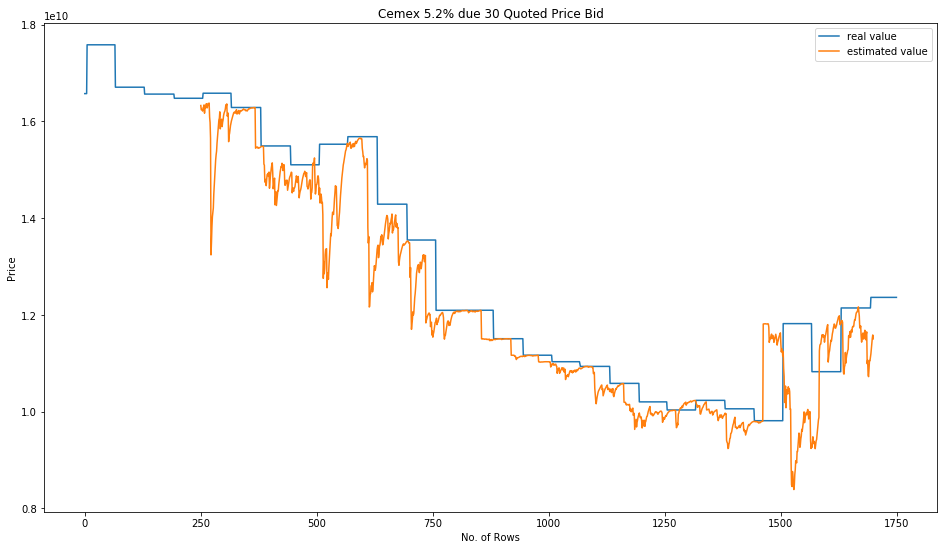

In [14]:
plt.figure(figsize=(16,9))
plt.plot(Cemex['Total Corporate Debt'], label = "real value")
plt.plot(simu_asset_price, label = "estimated value")
plt.xlabel('No. of Rows')
plt.ylabel('Price')
plt.title('Cemex 5.2% due 30 Quoted Price Bid')
plt.legend()

In [15]:
## Dividend yield 
Dividend_yield = pd.to_numeric(Cemex['Dividend Yield'], errors = 'coerce').to_numpy()
Dividend_yield = Dividend_yield / 100
Dividend_yield[0:20]

Dividend_yield = np.log(1 + Dividend_yield)

In [16]:
# I put Black Scholes dividend pricing model here. 
# But I don't feel like this is the model that we need. 

def priceBS_div(S0, K, T, r, sigma, q, Type):
    d1 = (np.log(S0/K) + (r - q + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S0/K) + (r - q - 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    if Type == "C":
        return S0*np.exp(-q*T)*stats.norm.cdf(d1,0,1) - K*np.exp(-r*T)*stats.norm.cdf(d2, 0, 1)
    else: 
        return K*np.exp(-r*T)*stats.norm.cdf(-d2, 0, 1) - S0*np.exp(-q*T)*stats.norm.cdf(-d1,0,1)

In [17]:
# Dividend paying 
simu_liability_price_div = []
for i in range(len(Equity_Returns)):
    simu_liability_price_div.append(Strike_Price[i] - priceBS_div(MV_Assets[i], Strike_Price[i], int(Expiration_Time[i]), Risk_Free_Rate[i], Annual_Volatility[i], Dividend_yield[i], 'P'))
simu_liability_price_div[1650:]

[11538156668.932636,
 11622681156.647476,
 11689495457.934315,
 11641373425.834719,
 11738073484.37585,
 11763723538.959908,
 11755279787.940268,
 11765604006.994883,
 11851669056.275032,
 11901435845.917429,
 11892822951.526348,
 11957882357.014965,
 12020348130.64609,
 12053521658.735271,
 12058551684.629341,
 12075660705.331287,
 12127724137.54507,
 12166364327.67431,
 12063899687.047068,
 11976774237.512642,
 11731243221.200665,
 11731554226.240175,
 11771809599.18661,
 11563814118.045586,
 11437691956.435638,
 11531075804.435297,
 11602200304.999134,
 11625740640.278757,
 11501280739.20539,
 11545932854.562904,
 11613828564.934504,
 11682706075.488972,
 11510680004.952114,
 11485879347.843487,
 11598160290.05418,
 11649360672.580418,
 10991418146.134003,
 11067017991.142757,
 10755476349.734236,
 10724125538.349125,
 10887390607.50172,
 11057518489.950249,
 11052715818.177013,
 11126376017.279655,
 11194005463.936726,
 11298319890.061796,
 11416354783.000847,
 11514933399.858122,


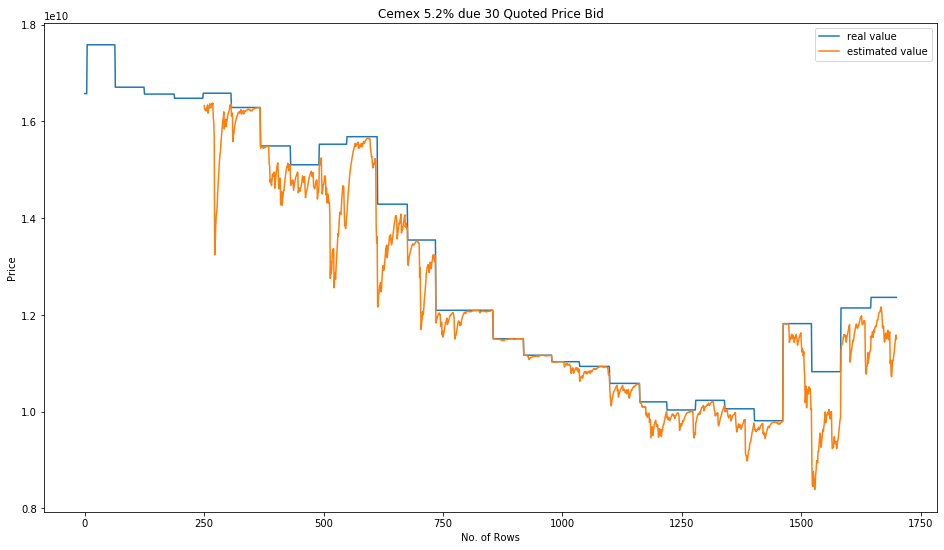

In [18]:
plt.figure(figsize=(16,9))
x = range(1700)
plt.plot(x, Cemex['Total Corporate Debt'], label = "real value")
plt.plot(x, simu_liability_price_div, label = "estimated value")
plt.xlabel('No. of Rows')
plt.ylabel('Price')
plt.title('Cemex 5.2% due 30 Quoted Price Bid')
plt.legend()